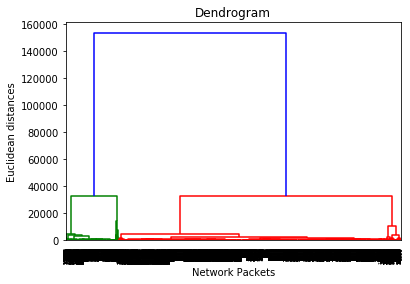

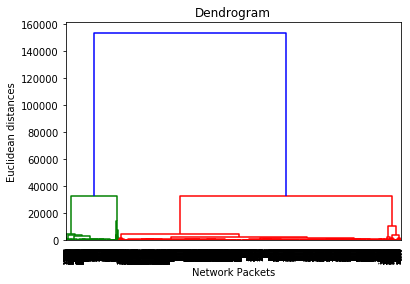

99.9653611813061


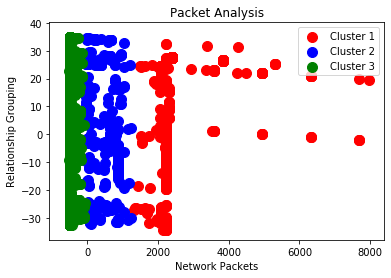

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("C:\\Users\\adity\\OneDrive\\Desktop\\AB1_data.csv")

dataset.isnull().sum()

dataset.drop(columns = ['No.', 'Info', 'Source', 'Destination'], axis = 1, inplace = True)

dataset = pd.get_dummies(dataset, drop_first = True)

#df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)
dataset.iloc[:,2:] = dataset.iloc[:,2:].apply(pd.to_numeric)

x = dataset.iloc[:,:]


import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Network Packets')
plt.ylabel('Euclidean distances')
plt.show()

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x = pca.fit_transform(x)
explain = pca.explained_variance_ratio_

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Network Packets')
plt.ylabel('Euclidean distances')
plt.show()

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

clust_acc = explain*100
print(clust_acc[0])

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Packet Analysis')
plt.xlabel('Network Packets')
plt.ylabel('Relationship Grouping')
plt.legend()
plt.show()